# A1b
Finn Hittson - fxh157  
CSDS464  
Due: 01/30/2023  

## 1. Common Functions

### 1a. `sinewave`

In [63]:
import math

# returns computed value along sinewave or list of values
#   t: int or list of times to compute sinewave at
#   f: sinewave frequency
#   d: sinewave delay in seconds
#   a: sinewave amplitude
def sinewave(t, f: float=1.0, d: float=0.0, a: float=1.0):
	if isinstance(t, int) or isinstance(t, float): # returns single computed value
		return a*math.sin(2*math.pi*f*(t + d))
	else: # returns list of computed values
		return [a*math.sin(2*math.pi*f*(i + d)) for i in t]

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# plots sinewave function
#   start: left most x-axis integer to compute
#   stop: right most x-axis integer to compute
#   step: increment from start and stop values
#   tick_step: x-axis increment size
#   ...
#   show_delay: ternary of whether to plot sinewave without delay
#   show_max: ternary of whther to show mark max of sinewave
#   threshold: value of threshold to plot
#   negpos: cross threshold from negative to positive
#   posneg: cross threshold from positive to negative
def plot_sinewave(
	start: float=-5, 
	stop: float=5, 
	step: int=0.01, 
	tick_step: float=1.0, 
	f: float=1.0, 
	d: float=0.0, 
	a: float=1.0, 
	show_delay: bool=False, 
	show_max: bool=False,
	threshold: float=None,
	negpos: bool=True,
	posneg: bool=False
	):
    # computes and plots sinewave from input parameters
    t = np.arange(start, stop + step, step)
    y = [sinewave(t=time, f=f, d=d, a=a) for time in t]

    if threshold is not None: # plots threshold
    	plt.plot(t, y, label=f"Sinwave", linewidth='2')
    	plt.plot([start, stop], [threshold, threshold], '--k', label="Threshold")
    	threshold_cross_idx = crossing(y, threshold, negpos=negpos, posneg=posneg)
    	t_thresh = [t[i] for i in threshold_cross_idx]
    	y_thresh = [y[i] for i in threshold_cross_idx]
    	plt.scatter(t_thresh, y_thresh, c='r', s=10, zorder=10, label="Cross Threshold")
    	plt.legend(loc='upper right')
    elif show_delay: # makes delayed sinewave a dashed line
    	plt.plot(t, y, '--', label=f"Delayed function: $d$={round(d, 3)} sec", linewidth='2')
    else: # normal delayed sinewave
    	plt.plot(t, y, label=f"Delayed function: $d$={round(d, 3)} sec", linewidth='2')

    # plots non-shifted sinewave to help visualize phase shift
    if show_delay:
        y_delay = [sinewave(t=time, f=f, d=0.0, a=a) for time in t]
        plt.plot(t, y_delay, label="Non-delayed function", linewidth='2')
        plt.legend()

    # marks sinewave maximum points
    if show_max:
        max_idx = localmaxima(y)
        t_max = [t[i] for i in max_idx]
        y_max = [y[i] for i in max_idx]
        plt.scatter(t_max, y_max, c='r', s=30, label=f'maximum: $a$={a}', zorder=10)
        plt.legend()

    # formatting graph
    plt.xlabel("Time $t$, (sec)", fontsize=16)
    plt.ylabel("$sin(2\\pi ft+\\phi)$", fontsize=16)
    plt.title(f"Sinewave, $f$={f}, $\\phi$={round(2*math.pi*f*d, 3)}, $d$={d} sec", fontsize=18)
    plt.xlim(start, stop)
    plt.xticks(np.arange(start, stop+tick_step/10, step=tick_step))
    plt.ylim(-2*a, 2*a)
    plt.show()


# returns indicies of local maximas on a 1D signal
def localmaxima(s):
	local_max = []
	for i in range(1, len(s)-1):
		if s[i] > s[i-1] and s[i] > s[i+1]:
			local_max.append(i)
	return local_max


# returns indices where signal crosses a threshold
def crossing(s, th, negpos: bool=True, posneg: bool=False):
	threshold_cross_idx = []
	for idx in range(1, len(s)):
		if negpos and posneg and ((s[idx] >= th and s[idx-1] < th) or (s[idx] < th and s[idx-1] >= th)):
			threshold_cross_idx.append(idx)
		if negpos and not posneg and s[idx] >= th and s[idx-1] < th:
			threshold_cross_idx.append(idx)
		if not negpos and posneg and s[idx] < th and s[idx-1] >= th:
			threshold_cross_idx.append(idx)
	return threshold_cross_idx

#### Time to sample index:  
Let $t$ be time in seconds and $f_s$ be the sampling frequency in samples per second.
\begin{align}  
\lfloor t(sec)\times f_s(samples/sec)\rfloor=samples
\end{align}
$samples$ is the position of a single value in the correspoding signal so to convert to zero based indexing $samples$ needs $1$ to be subtracted from it.  
\begin{align} 
samples - 1 = i
\end{align}
where $i$ is the sample index.

#### Time delay to phase:
Let $d$ be the time delay in seconds and $f$ be the frequency in Hz. Then to convert to phase in radians use the following equation:  
\begin{align}
\phi(f,d)=2\pi(radians)f(1/sec)d(sec)=2\pi fd (radians)
\end{align}
The resulting value for the phase is in radians.

#### Examples:
Example 1: Compute the value at 0.0 seconds of a sinewave with 5Hz frequency and 0.05 seconds delay.

In [65]:
sinewave(t=0.0, f=5, d=0.05)

1.0

Example 2: Plot a sinewave with 5Hz frequency, and 0.05 seconds delay.

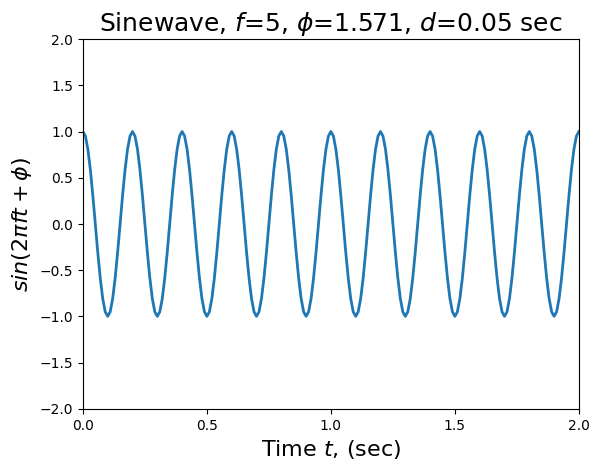

In [66]:
plot_sinewave(start=0, stop=2, tick_step=0.5, f=5, d=0.05)

Example 3: Plot a sinewave with 5Hz frequency that is delayed by 0.05 seconds with delay visualization enabled from times -0.1 to 1.0.

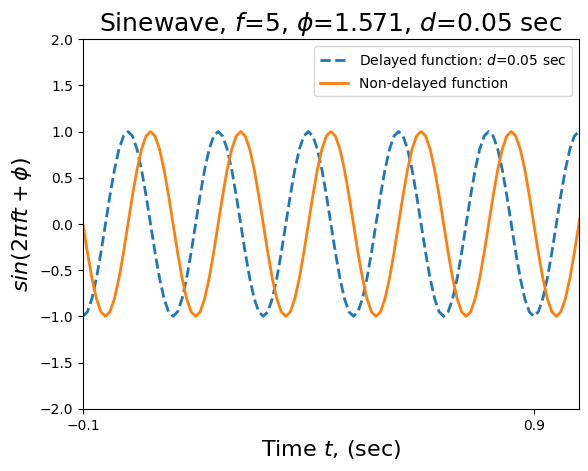

In [67]:
plot_sinewave(start=-0.1, stop=1.0, f=5, d=0.05, show_delay=True)

Example 4: Plot a sinewave with $5Hz$ frequency, and a sampling frequency of $200Hz$ while raning from $0.0$ to $0.5$ seconds. Plot a threshold at $y=0.5$ and mark the points where the wave form crosses the threshold. 

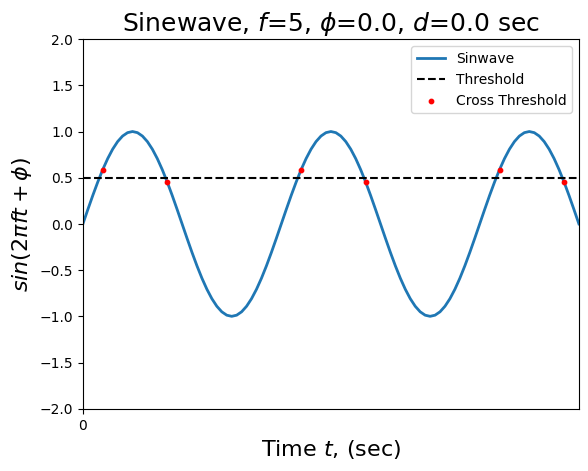

In [68]:
plot_sinewave(start=0.0, stop=0.5, step=1/200, f=5, threshold=0.5, posneg=True)

### 1b. `gabor`

In [69]:
# even gabor function
#   t: time value to compute the gabor value
#   f: gabor/cos frequency
#   a: gabor amplidute
#   d: gabor/cos delay
#   sigma: Gaussian width
def gabore(t, f: float=1.0, a: float=1.0, d: float=0.0, sigma: float=1.0) -> float:
	return a*math.exp(-t**2/(2*sigma**2)) * math.cos(2*math.pi*f*(t + d))


# odd gabor function
# 	...
def gaboro(t, f: float=1.0, a: float=1.0, d: float=math.pi/2, sigma: float=1.0) -> float:
	return a*math.exp(-t**2/(2*sigma**2)) * math.cos(2*math.pi*f*t + d)

In [70]:
# computes the normalization constant of the even gabor function over a range of time
#   start: left most time point to begin measurments at
#   stop: right most time point to end measurments at 
#   sample_f: sampling frequency with which to measure time points at
#	...
def gabore_norm(y: list=None, fs: float=10000.0, f: float=1.0, d: float=0.0, sigma: float=1.0):
	if y is None:
		t = np.arange(-4*sigma, 4*sigma, 1/fs)
		y = np.array([gabore(t=i, f=f, d=d, sigma=sigma) for i in t])
	return np.linalg.norm(y)


# computes the normalization constant of the odd gabor function over a range of time
#	...
def gaboro_norm(y: list=None, fs: float=0.1, f: float=1.0, d: float=math.pi/2, sigma: float=1.0):
	if y is None:
		t = np.arange(-4*sigma, 4*sigma, 1/fs)
		y = np.array([gaboro(t=i, f=f, d=d, sigma=sigma) for i in t])
	return np.linalg.norm(y)

In [71]:
# plots gabor function
#   start: left most x-axis integer to compute
#   stop: right most x-axis integer to compute
#   step: increment from start and stop values
# 	...
def plot_gabor(start: float=-5, stop: float=5, fs: float=10000, f: float=1.0, d: float=0.0, sigma: float=1.0):
	# computes and plots gabor function from input parameters
	t = np.arange(start, stop+1/fs, 1/fs)
	y = np.array([gabore(t=time, f=f, d=d, sigma=sigma) for time in t]) # un-normalized
	a = 1/gabore_norm(y) # normalize
	plt.plot(t, y*a)
	
	# formatting graph
	plt.xlabel("Time $t$, (sec)", fontsize=16)
	plt.ylabel("$a\\cdot exp\\left(\\frac{-t^2}{2\\sigma^2}\\right)cos(2\\pi ft+\\phi)$", fontsize=16)
	plt.title(f"Gabor Function, $a$={round(a, 3)}, $f$={f}, $\\phi$={round(d, 3)}, $\\sigma$={sigma}", fontsize=18)
	plt.show()

In [72]:
# plots grid of gabor functions for lists of input values
def plot_gabor_grid(rows: int=2, cols: int=2, start: float=-5, stop: float=5, fs: int=10000, f: list=[], d: list=[], sigma: list=[]):
	# only plots if correct number of inputs are inputted
	if cols*rows != len(f) or cols*rows != len(d) or cols*rows != len(sigma):
		print("Please enter correct number of values for f, d, and/or, sigma")
		return

	# generating plots
	fig, axs = plt.subplots(rows, cols)
	t = np.arange(start, stop, 1/fs)
	idx = 0
	for row in range(rows):
		for col in range(cols):
			y = np.array([gabore(t=time, f=f[idx], d=d[idx], sigma=sigma[idx]) for time in t])
			a = gabore_norm(fs=fs, f=f[idx], d=d[idx], sigma=sigma[idx])
			axs[row,col].plot(t,y*a)
			axs[row,col].set_title(f"$f$={f[idx]}, $a$={round(a, 3)}, $\\phi$={round(d[idx], 3)}, $\\sigma$={round(sigma[idx],3)}", fontsize=6)
			axs[row,col].set_xticks(np.arange(-0.08, 0.081, 0.04))
			idx += 1
	
	# figure formatting
	fig.supxlabel("Time $t$, (sec)", fontsize=16)
	fig.supylabel("$a\\cdot exp\\left(\\frac{-t^2}{2\\sigma^2}\\right)cos(2\\pi ft+\\phi)$", fontsize=16)
	fig.suptitle("Gabor Functions", fontsize=18)
	plt.subplots_adjust(hspace=0.4, wspace=0.3)
	plt.show()

In [73]:
# plots a gabor function as a stem plot
def plot_gabor_stem(start: float=-5, stop: float=5, fs: float=16, f: float=0.01, d: float=0.0, sigma: float=1.0):
	# computes and plots gabor function from input parameters
	t = np.arange(-4*sigma, 4*sigma, 1/fs)
	y = np.array([gabore(t=time, f=f, d=d, sigma=sigma) for time in t]) # un-normalized
	a = gabore_norm(y) # normalization constant
	
	for idx, val in enumerate(y):
		plt.plot([t[idx], t[idx]], [0,val*a], 'b', linewidth=0.5)
		plt.scatter([t[idx]], [val*a], s=20, c='b')
	
	# formatting graph
	plt.xlabel("Time $t$, (sec)", fontsize=16)
	plt.ylabel("$a\\cdot exp\\left(\\frac{-t^2}{2\\sigma^2}\\right)cos(2\\pi ft+\\phi)$", fontsize=16)
	plt.title(f"Gabor Function, $a$={round(a, 3)}, $f$={f}, $\\phi$={round(d, 3)}, $\\sigma$={sigma}", fontsize=18)
	plt.show()

#### Examples

Example 1: Compute the value at $t=0.0$ for the even gabor with frequency $100Hz$ and standard deviation $\sigma=0.01$.

In [74]:
gabore(t=0.0, f=100, sigma=0.01)

1.0

Example 2: Compute the value at $t=-3$ for the odd gabor with frequency $0.0625Hz$ and standard deviation $\sigma=8$.

In [75]:
gaboro(t=-3, f=0.0625, sigma=8)

0.8611504148937256

Example 3: Compute the even gabor norm with frequency $f=100Hz$, $\sigma=0.01$, and frequency sampling rate $fs=10000$.

In [76]:
gabore_norm(fs=10000, f=100, sigma=0.01)

9.41396254321014

Example 4: Compute the value of the normalized odd gabor function at $t=0.003$ with freqency $f=100Hz$, and standard deviation $\sigma=0.01$.

In [77]:
a = 1/gaboro_norm(fs=10000, f=100, sigma=0.01)
gaboro(t=0.003, f=100, sigma=0.01, a=a)

-0.0965807571727947

Example 5: Plot a normalized even Gabor function using a frequency of $f=100Hz$, and standard deviation $\sigma=1/f$.

In [78]:
plot_gabor(start=-0.05, stop=0.05, f=100, sigma=1/100)

Example 6: Make a step plot of an odd gabor function with frequency $16$ samples per period and standard deviation $\sigma=8$

In [79]:
plot_gabor_stem(start=-32, stop=32, fs=1, f=1/16, d=math.pi/2, sigma=8)

Example 7: Create a $3$ x $3$ grid of gabor functions with frequencies $f=100,200,300Hz$ on the rows and standard deviations $\sigma=n/f$ for $n=1,2,3$ on the rows. 

In [80]:
f = [100, 200, 300,100, 200, 300,100, 200, 300]
sigma = [1/100, 1/200, 1/300, 2/100, 2/200, 2/300, 3/100, 3/200, 3/300]
d = [0,0,0,0,0,0,0,0,0]
plot_gabor_grid(rows=3, cols=3, start=-0.08, stop=0.08, fs=10000, f=f, d=d, sigma=sigma)

### 1c. `gammatone`

In [81]:
# returns gammatone point(s)
# 	t: time list or floating point
#	f: gammatone frequency
#	d: delay in seconds
#	n: shape parameter
#	a: amplitude
def gammatone(t, f: float=1.0, d: float=0.0, n: float=4.0, a: float=1.0):
	b = (1.019*24.7*(4.37*f/1000 + 1))
	if isinstance(t, int) or isinstance(t, float): # computes gammatone for list of times
		return a*pow(t, n-1)*math.exp(-2*math.pi*b*t)*math.cos(2*math.pi*f*(t + d))
	else: # computes single value of gammatone
		gt = []
		for time in t:
			gt.append(pow(time, n-1)*math.exp(-2*math.pi*b*time)*math.cos(2*math.pi*f*time + d))
		return np.array(gt) / math.sqrt(np.linalg.norm(gt))


In [82]:
# returns norm of gammatone function
def gammatone_norm(y: list=None, stop: float=100, sf: float=10000, f: float=1.0, d: float=0.0, n: float=4.0):
	if y is None:
		t = np.arange(0, stop, 1/sf)
		y = np.array([gammatone(t=i, f=f, d=d, n=n) for i in t])
	return np.linalg.norm(y)

In [83]:
# plots gammatone function
#   start: left most x-axis integer to compute
#   stop: right most x-axis integer to compute
#   step: increment from start and stop values
# 	tick_step: x-axis increment value
# 	...
def plot_gammatone(
	start: int=0, 
	stop: int=100, 
	step: int=0.0001, 
	tick_step: float=1.0, 
	f: float=1.0, 
	d: float=0.0, 
	n: float=4.0, 
	a: float=1.0,
	mark_max: bool=False
	):
	# plots gammatone function
	t = np.arange(start, stop + step, step)
	y = gammatone(t=t.tolist(), f=f, d=d, n=n)
	a = 1/gammatone_norm(y)
	plt.plot(t, y*a, label='Gammatone')

	if mark_max:
		max_idx = localmaxima(y*a)
		y_max = np.array([y[i] for i in max_idx])
		t_max = [t[i] for i in max_idx]
		plt.scatter(t_max, a*y_max, c='r', s=20, zorder=10, label='Local Maximum')
		plt.legend(loc='upper right')

	# formatting graph
	plt.xlabel("Time $t$, (sec)", fontsize=16)
	plt.ylabel("$at^{n-1}e^{-2\\pi bt}cos(2\\pi ft+\\phi)$", fontsize=16)
	plt.title(f"Gammatone, $f$={f}, $\\phi$={round(d, 3)}, $n$={n}", fontsize=18)
	plt.show()

#### Examples:

Example 1: Compute the value of the normalized gammatone at $t=0.01$ seconds with frequency $f=100Hz$.

In [84]:
gammatone(t=0.01, f=100, a=1/gammatone_norm(f=100))

0.10873332003195081

Example 2: Plot a normalized gammatone function with frequency $f=200Hz$ and $n=4$.

In [85]:
plot_gammatone(stop=0.05, f=200)

Example: Plot the gammatone with frequency $f=200Hz$ and $n=4$ from times $0$ to $0.05$ with markers at the maximum. 

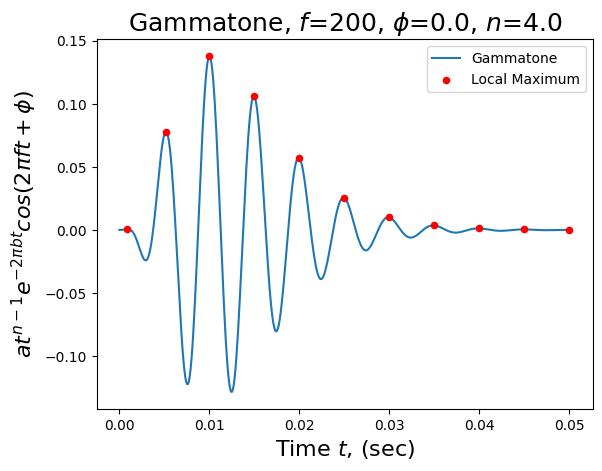

In [86]:
plot_gammatone(f=200, stop=0.05, mark_max=True)

## 2. Simple Computation

### 2a. `localmaxima`

In [87]:
# returns indicies of local maximas on a 1D signal
#	s: input signal
def localmaxima(s):
	local_max = []
	for i in range(1, len(s)-1):
		if s[i] > s[i-1] and s[i] > s[i+1]:
			local_max.append(i)
	return local_max

#### Examples:

Example 1: Compute the local maximum indices for the array $[1, 3, 2, -2, 2, 4, 8, 6]$.

In [88]:
localmaxima([1, 3, 2, -2, 2, 4, 8, 6])

[1, 6]

### 2b. `crossings`

In [89]:
# returns indices where signal crosses a threshold
# 	s: input signal
# 	th: threshold value
#	negpos: define threshold direction to be from negative to positive
#	posneg: define threshold direction to be from positive to negative
def crossing(s, th, negpos: bool=True, posneg: bool=False):
	threshold_cross_idx = []
	for idx in range(1, len(s)):
		if negpos and posneg and ((s[idx] >= th and s[idx-1] < th) or (s[idx] < th and s[idx-1] >= th)):
			threshold_cross_idx.append(idx)
		if negpos and not posneg and s[idx] >= th and s[idx-1] < th:
			threshold_cross_idx.append(idx)
		if not negpos and posneg and s[idx] < th and s[idx-1] >= th:
			threshold_cross_idx.append(idx)
	return threshold_cross_idx

#### Examples:

Example 1: Compute the crossing indices for the array $[-1, 0, 1, 2, 0, -2]$ and a threshold of $1$.

In [90]:
crossing([-1, 0, 1, 2, 0, -2], th=1, posneg=True)

[2, 4]

### 2c. `envelope`

In [91]:
# returns maximum and minimum values within the nblocks of the waveform y
#	y: input waveform as a list
#	nblocks: number of regions to search for min and max in
def envelope(y, nblocks: int=10):
	blockindices = list(range(0, len(y), nblocks))
	ylower = [min(y[b_idx: b_idx+nblocks]) for b_idx in blockindices]
	yupper = [max(y[b_idx: b_idx+nblocks]) for b_idx in blockindices]
	return ylower, yupper, blockindices


#### Example:

Example 1: Compute the envelope for the array $[5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7]$ with $nblocks=3$.

In [92]:
envelope([5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7], nblocks=3)

([2, 3, -9, -7], [5, 4, 0, 9], [0, 3, 6, 9])

## Sound wave functions

In [108]:
from scipy.io import wavfile
from itertools import chain


# reads .wav files and returns data
def read_wav_file(filepath):
    sr, data = wavfile.read(filepath)
    return sr, data


# plots envelope
#   y: input waveform or signal
#	nblocks: number of regions to search for min and max in
def plot_envelope(y, nblocks):
    # finds mins and maxes
    ylower, yupper, _ = envelope(y, nblocks)
    t = np.arange(0, 5, 5/len(ylower))
    plt.plot(t, ylower, 'b')
    plt.plot(t, yupper, 'b')

    # graph formatting
    plt.xlabel("Time $t$, (sec)", fontsize=16)
    plt.ylabel("Amplitude, (relative)", fontsize=16)
    plt.title(f"Sound Wave, nblocks={nblocks}", fontsize=18)
    plt.show()


# converts time to index
#   time: input time
#   fs: sample frequency (samples/sec)
def timetoindex(t, fs):
	return t * fs

In [109]:
# plots a sound wave
#   s: input signal
#   sr: sample rate (samples/sec)
#   start: starting time
#   stop: stoping time
def plot_sound_wave(s, sr, start, stop):
	i = start * sr
	y = []
	t = []
	while i < stop * sr:
		y.append(s[int(i)])
		t.append(i/sr)
		i += 1
	plt.plot(t, y)
	plt.xlabel("Time $t$, (sec)", fontsize=16)
	plt.ylabel("Amplitude, (relative)", fontsize=16)
	plt.title("Sound Wave", fontsize=18)
	plt.show()

#### Example:

Example 1: Plot the audio waveform "speech.wav" from times $3.0$ to $3.1$ seconds.

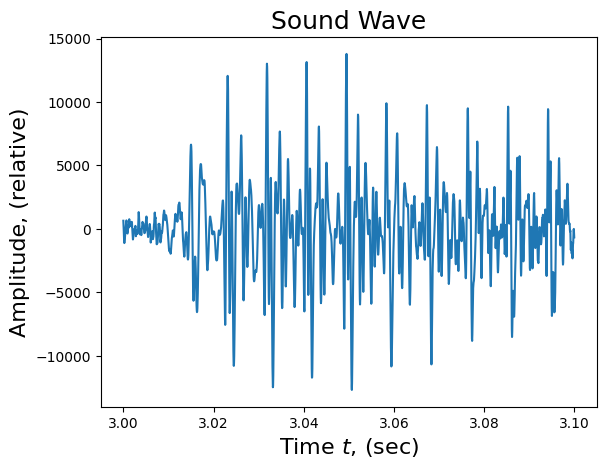

In [110]:
filepath = "./speech.wav"
sr, data = read_wav_file(filepath)
plot_sound_wave(data, sr, start=3.0, stop = 3.1)

Example 2: Plot the "speech.wav" waveform using the envelope function with 500 blocks.

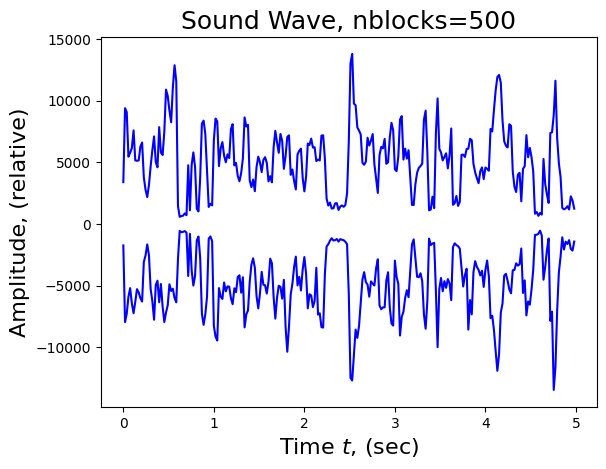

In [111]:
filepath = "./speech.wav"
sr, data = read_wav_file(filepath)
plot_envelope(data, nblocks=500)

Exercies 3: Convert time $0.25$ seconds to a zero based time index where the sampling frequency is $1000$ samples per second.

In [112]:
timetoindex(t=0.25, fs=1000)

250.0